## Something about computation

+ Search, Order, Retrieval
+ Machine Learning, Search Engine
+ Graph 
+ Data Mining
+ Natural Language Processing 
+ Computer Vision
+ Gate Computation # 二级制来表达复杂的数字，运行复杂的运算
+ 计算机编程语言：Computation

In [3]:
def add(a, b): return a + b

In [4]:
import re

In [14]:
pattern = r'(\w*).?(\d+)'

In [12]:
some_texts = """
hello my name is Jhon, my phone number is 189100,
Tom my phone is 8522589
"""

In [15]:
for line in some_texts.split('\n'):
    print(re.findall(pattern, line))

[]
[('is', '189100')]
[('is', '8522589')]
[]


In [16]:
import numpy as np

In [18]:
import matplotlib.pyplot as plt

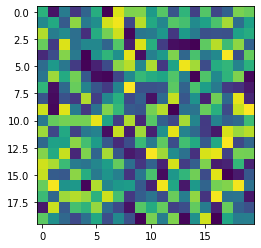

In [19]:
plt.imshow(np.random.randint(256, size=(20, 20)))

# What is Computation? 

## Computation Models and Complexity

所谓计算，主要其实关注变化：一种能够变化的能力，不是随机的

输入 -> 输出

$$ x -> x + 1 $$
$$ x -> (x + 1) \% 2 $$

$$ x_{i + 1} = x_{i} + 1 $$
$$ x_{i + 1} = (x_{i} + 1) \% 2 $$

变化从单点，扩展到一条线

In [21]:
some_numbers = [0, 0, 0, 0, 1, 0, 0, 0, 0]

In [93]:
bin(250)[2:].zfill(8)

'11111010'

### Rule - 250

1. if and only if 左右两边都是0， 则下一个是0， 否则，下一个就是1

| prev |  111 | 110 | 101 | 100 | 011 | 010 | 001 | 000 |
|-|-|-|-|-|-|-|-|-|
|next| 1| 1| 1 |1 |1 |0 |1 |0 |

### Rule 50

1. for current cell is 0: if and only if 左右两边都是0， 则下一个是0， 否则，下一个就是1
2. for current cell is 1: the next state to 0 

| prev |  111 | 110 | 101 | 100 | 011 | 010 | 001 | 000 |
|-|-|-|-|-|-|-|-|-|
|next| 0 | 0| 1 |1 |0 |0 |1 |0 |

In [22]:
from typing import Iterable

In [95]:
rule_50 = {
    '111': 0,
    '110': 0,
    '101': 1,
    '100': 1,
    '011': 0,
    '010': 0,
    '001': 1,
    '000': 0
}

In [69]:
def ring_cells(initial: Iterable, rule: dict) -> Iterable:
    for index, now in enumerate(initial):
        state = initial[index - 1], now, initial[(index + 1) % len(initial)]
        state_str = ''.join(map(str, state))
        next_state = rule[state_str]
        
        yield next_state

In [32]:
list(ring_cells([0, 0, 0, 0, 1, 0, 0, 0, 0], rule))

[0, 0, 0, 1, 0, 1, 0, 0, 0]

In [39]:
def automata_cell_for_loop(initial, step=1, *, cell_function, rule, mointer=False):
    current = initial
    history = [current]
    
    while step >= 0:
        if mointer: 
            print(f'current: {current}')
        output = list(cell_function(current, rule))
        history.append(output)
        current = output
        step -= 1

    return history

In [77]:
output = automata_cell_for_loop([0]*5 + [1, 1, 1] + [0]*5, step=10, 
                      cell_function=ring_cells,
                      rule=rule_new)

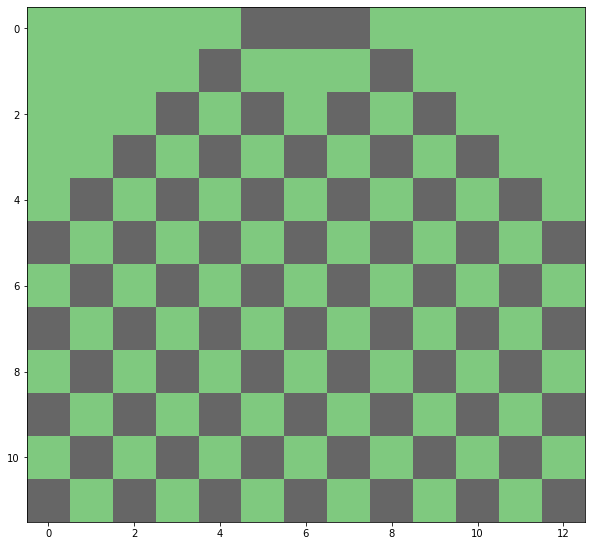

In [78]:
pretty_print(output)

In [59]:
import matplotlib

In [61]:
cmap = matplotlib.cm.Accent
cmap.set_bad(color='white')

/var/folders/d8/0s3c3vcs47qccb955ykczzkm0000gn/T/ipykernel_3508/241173723.py:2: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Accent").copy()
  cmap.set_bad(color='white')


In [63]:
def pretty_print(binary_rows):
    global cmap
    plt.figure(figsize=(10, 10))
    plt.imshow(binary_rows, cmap=cmap)

In [66]:
output = automata_cell_for_loop([0]*100 + [1, 1, 1] + [0]*10, step=100, 
                      cell_function=ring_cells,
                      rule=rule)

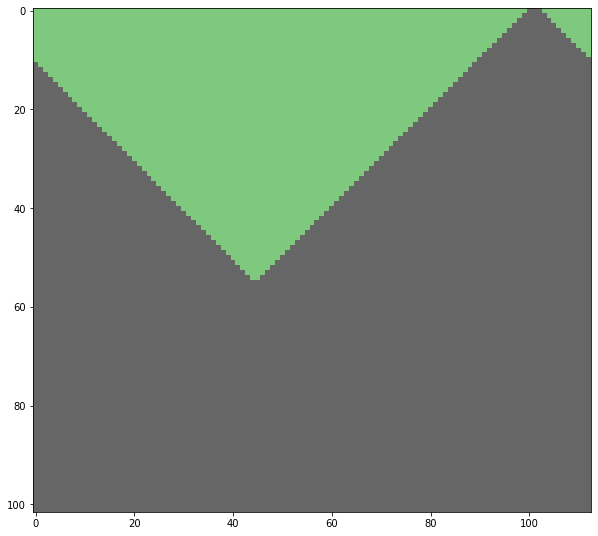

In [67]:
pretty_print(output)

In [100]:
bin(146)

'0b10010010'

In [97]:
def generate_1_dimension_rule_by_number(number):
    neighbor_num = 2
    rule_map = {}
    rule_length = 2 ** (neighbor_num + 1)
    binary_code = bin(number)[2:].zfill(rule_length)
    
    for i in range(rule_length):
        rule_map[bin(i)[2:].zfill(neighbor_num+1)] = int(binary_code[::-1][i])
    
    return rule_map

In [102]:
generate_1_dimension_rule_by_number(146)

{'000': 0,
 '001': 1,
 '010': 0,
 '011': 0,
 '100': 1,
 '101': 0,
 '110': 0,
 '111': 1}

In [302]:
%matplotlib inline

In [308]:
generate_1_dimension_rule_by_number(110)

{'000': 0,
 '001': 1,
 '010': 1,
 '011': 1,
 '100': 0,
 '101': 1,
 '110': 1,
 '111': 0}

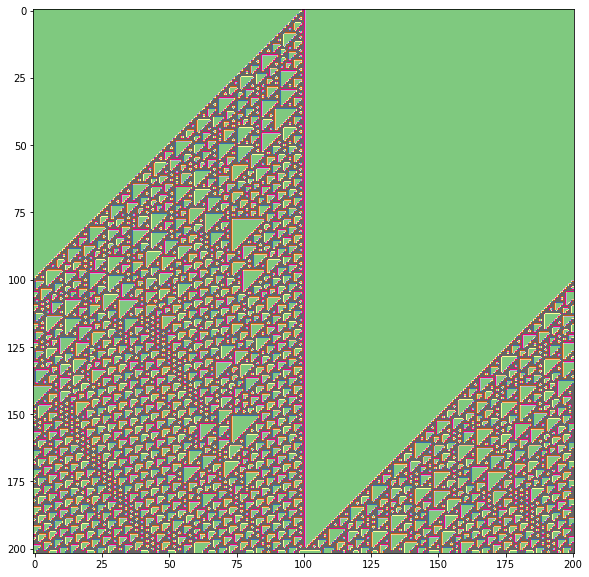

In [314]:
pretty_print(automata_cell_for_loop([0] * 100 + [1] + [0] * 100, step=200, 
                      cell_function=ring_cells,
                      rule=generate_1_dimension_rule_by_number(110))
            )

In [311]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [109]:
import random

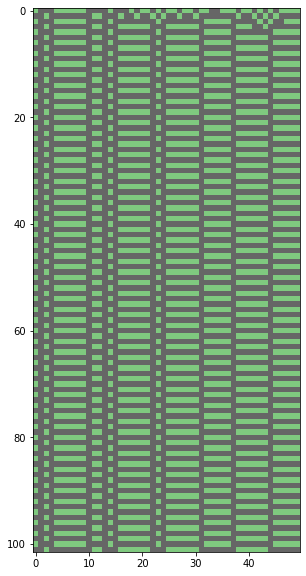

In [324]:
pretty_print(automata_cell_for_loop([random.randint(0, 1) for _ in range(50)], step=100, 
                      cell_function=ring_cells,
                      rule=generate_1_dimension_rule_by_number(123))
            )

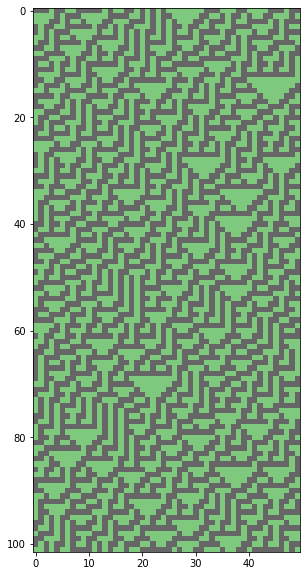

In [128]:
pretty_print(automata_cell_for_loop([random.randint(0, 1) for _ in range(50)], step=100, 
                      cell_function=ring_cells,
                      rule=generate_1_dimension_rule_by_number(30))
)

#### Rule: 30 --> 实现随机数的产生

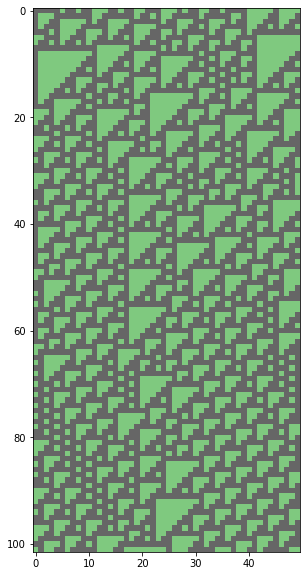

In [137]:
pretty_print(automata_cell_for_loop([random.randint(0, 1) for _ in range(50)], step=100, 
                      cell_function=ring_cells,
                      rule=generate_1_dimension_rule_by_number(110))
)

## 所有可以计算的运算，都可以进行
## 除了不能判断是否运算需要暂停

+ N -> f(N) -> M
+ 如果一种变化，可以写成数学运算，这个机器可以实现任意的运算： Turning Machine / Turning Complete 
+ Turning Machine: Halting Problem

+ 给定一段程序的源代码，计算机是否可以通过分析源代码，不运行的情况下，100%推测出来该程序不是死循环~
+ Computation Theory & Automata 

## 计算模型

+ inputs
+ 互相的规则是什么

=> 复杂的运算效果

In [58]:
n = 3
width = 10
list(range(n, width))

[3, 4, 5, 6, 7, 8, 9]

In [122]:
import time

In [123]:
!pip install tqdm

Looking in indexes: https://pypi.douban.com/simple
     |████████████████████████████████| 76 kB 9.4 MB/s  eta 0:00:01


In [124]:
import tqdm

In [126]:
for _ in tqdm.tqdm_notebook(range(13 * 60)):
    time.sleep(1)

/var/folders/d8/0s3c3vcs47qccb955ykczzkm0000gn/T/ipykernel_3508/2556475619.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm.tqdm_notebook(range(13 * 60)):


  0%|          | 0/780 [00:00<?, ?it/s]

In [141]:
def double_loop(n):
    result = 0 
    for i in range(n):
        for j in range(n):
            result += (i - j)
            
    return result

In [142]:
import dis

In [143]:
dis.dis(double_loop)

  2           0 LOAD_CONST               1 (0)
              2 STORE_FAST               1 (result)

  3           4 LOAD_GLOBAL              0 (range)
              6 LOAD_FAST                0 (n)
              8 CALL_FUNCTION            1
             10 GET_ITER
        >>   12 FOR_ITER                15 (to 44)
             14 STORE_FAST               2 (i)

  4          16 LOAD_GLOBAL              0 (range)
             18 LOAD_FAST                0 (n)
             20 CALL_FUNCTION            1
             22 GET_ITER
        >>   24 FOR_ITER                 8 (to 42)
             26 STORE_FAST               3 (j)

  5          28 LOAD_FAST                1 (result)
             30 LOAD_FAST                2 (i)
             32 LOAD_FAST                3 (j)
             34 BINARY_SUBTRACT
             36 INPLACE_ADD
             38 STORE_FAST               1 (result)
             40 JUMP_ABSOLUTE           12 (to 24)

  4     >>   42 JUMP_ABSOLUTE            6 (to 12)

  7     

## 实现了什么功能呢？ 

+ 1 -> 2 -> 3 .. width: W
+ range(1, W)

## 个体之间，基于简单规则所演化出来的计算

## 神经网络， 对象链接，拓扑排序: C语言实现，很困难

M = (Q, Σ, Γ, δ, b, q0, qf)

with

+ Q is a finite, non-empty set of states
+ Γ is a finite, non-empty set of the tape alphabet
+ Σ is the set of input symbols with Σ ⊂ Γ
+ δ is a partially defined function, the transition function:
+ δ : (Q \ {qf}) x Γ → Q x Γ x {L,N,R}
+ b ∈ &Gamma \ Σ is the blank symbol
+ q0 ∈ Q is the initial state
+ qf ∈ Q is the set of accepting or final states

Let's define a Turing machine, which complements a binary input on the tape, i.e. an input "1100111" e.g. will be turned into "0011000".
+ Σ = {0, 1}
+ Q = {init, final}
+ q0 = init
+ qf = final

+ (init, 0) => (init, 1)
+ (init, 1) => (init, 0)
+ (inint, Empty) => (final, Empty)

In [145]:
class Tape:
    
    blank_symbol = " "
    
    def __init__(self,
                 tape_string = ""):
        self.__tape = dict((enumerate(tape_string)))
        # last line is equivalent to the following three lines:
        #self.__tape = {}
        #for i in range(len(tape_string)):
        #    self.__tap[i] = input[i]
        
    def __str__(self):
        s = ""
        min_used_index = min(self.__tape.keys()) 
        max_used_index = max(self.__tape.keys())
        for i in range(min_used_index, max_used_index):
            s += self.__tape[i]
        return s    
    
    def __getitem__(self,index):
        if index in self.__tape:
            return self.__tape[index]
        else:
            return Tape.blank_symbol

    def __setitem__(self, pos, char):
        self.__tape[pos] = char 

        
class TuringMachine(object):
    
    def __init__(self, 
                 tape = "", 
                 blank_symbol = " ",
                 initial_state = "",
                 final_states = None,
                 transition_function = None):
        self.__tape = Tape(tape)
        self.__head_position = 0
        self.__blank_symbol = blank_symbol
        self.__current_state = initial_state
        if transition_function == None:
            self.__transition_function = {}
        else:
            self.__transition_function = transition_function
        if final_states == None:
            self.__final_states = set()
        else:
            self.__final_states = set(final_states)
        
    def get_tape(self): 
        return str(self.__tape)
    
    def step(self):
        char_under_head = self.__tape[self.__head_position]
        x = (self.__current_state, char_under_head)
        if x in self.__transition_function:
            y = self.__transition_function[x]
            self.__tape[self.__head_position] = y[1]
            if y[2] == "R":
                self.__head_position += 1
            elif y[2] == "L":
                self.__head_position -= 1
            self.__current_state = y[0]

    def final(self):
        if self.__current_state in self.__final_states:
            return True
        else:
            return False

In [147]:
initial_state = "init",
accepting_states = ["final"],
transition_function = {("init","0"):("init", "1", "R"),
                       ("init","1"):("init", "0", "R"),
                       ("init"," "):("final"," ", "N"),
                       }
final_states = {"final"}

t = TuringMachine("11001101 ", 
                  initial_state = "init",
                  final_states = final_states,
                  transition_function=transition_function)

print("Input on Tape:\n" + t.get_tape())

while not t.final():
    t.step()

print("Result of the Turing machine calculation:")    
print(t.get_tape())

Input on Tape:
11001101
Result of the Turing machine calculation:
00110010


## 状态转移模型
+ 数学计算
    + 数据挖掘
    + 计算机视觉
    + 科学计算
+ Text Pattern / 正则表达式

## Procedure

In [149]:
for _ in tqdm.tqdm_notebook(range(13 * 60)):
    time.sleep(1)

/var/folders/d8/0s3c3vcs47qccb955ykczzkm0000gn/T/ipykernel_3508/2556475619.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm.tqdm_notebook(range(13 * 60)):


  0%|          | 0/780 [00:00<?, ?it/s]

+ Compuation Theory
+ Programming Language 
+ Automate

编程习惯的:
1. 面向对象
2. 面向过程

```Java
public class Main{
    public int main(Integer m){
        System.out.println(m);
    }
}
```

```c

int a = 0;
int ans = 0;

for(i=0; i<=10; i++){
    ans += a
}
```

面向函数 functional programming 

NOT
```python
[a + b for a in range(10) for b in range(9)]
```

面向函数：世界上所有的东西，都是函数

In [226]:
NOTHING = lambda x: x

In [228]:
ZERO = lambda f: NOTHING

In [274]:
def inc(n):
    return lambda f: lambda x: f(n(f)(x))

In [289]:
ZERO.__code__.co_code

b't\x00S\x00'

In [298]:
TWO = inc(ONE)

In [279]:
TWO.__code__.co_code

b'\x87\x00\x87\x01f\x02d\x01d\x02\x84\x08S\x00'

In [281]:
inc(TWO).__code__.co_code

b'\x87\x00\x87\x01f\x02d\x01d\x02\x84\x08S\x00'

In [282]:
THREE = add(add(inc(ZERO), inc(ZERO)), inc(ZERO))

In [283]:
THREE.__code__.co_code

b'\x87\x00\x87\x01\x87\x02f\x03d\x01d\x02\x84\x08S\x00'

In [284]:
add(inc(inc(ZERO)), inc(ZERO)).__code__.co_code

b'\x87\x00\x87\x01\x87\x02f\x03d\x01d\x02\x84\x08S\x00'

In [285]:
def add(n1, n2):
    return lambda f: lambda x: n1(f)(n2(f)(x))

In [286]:
inc(ZERO).__code__.co_code

b'\x87\x00\x87\x01f\x02d\x01d\x02\x84\x08S\x00'

In [287]:
add(add(inc(ZERO), inc(ZERO)), inc(ZERO)).__code__.co_code

b'\x87\x00\x87\x01\x87\x02f\x03d\x01d\x02\x84\x08S\x00'

In [288]:
add(inc(inc(ZERO)), inc(ZERO)).__code__.co_code

b'\x87\x00\x87\x01\x87\x02f\x03d\x01d\x02\x84\x08S\x00'

组成list，list取到index ..

In [325]:
%matplotlib notebook

<IPython.core.display.Javascript object>


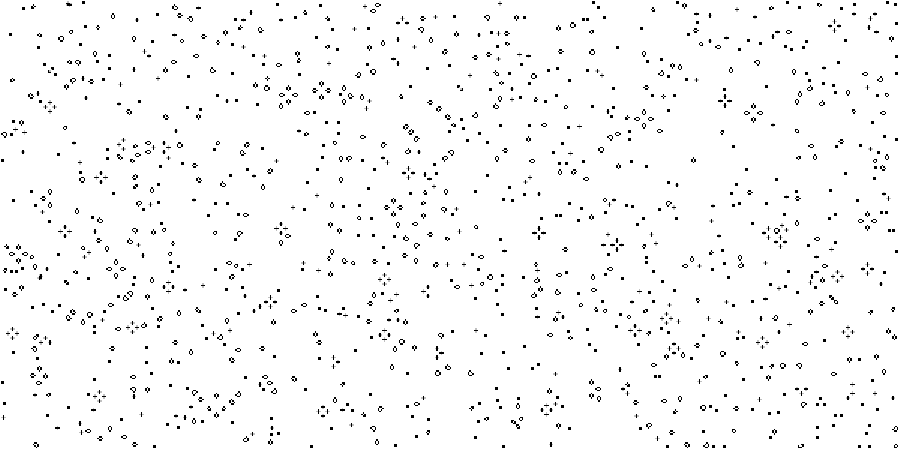

In [326]:
# -----------------------------------------------------------------------------
# From Numpy to Python
# Copyright (2017) Nicolas P. Rougier - BSD license
# More information at b
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def update(*args):
    global Z, M

    N = (Z[0:-2, 0:-2] + Z[0:-2, 1:-1] + Z[0:-2, 2:] +
         Z[1:-1, 0:-2]                 + Z[1:-1, 2:] +
         Z[2:  , 0:-2] + Z[2:  , 1:-1] + Z[2:  , 2:])
    birth = (N == 3) & (Z[1:-1, 1:-1] == 0)
    survive = ((N == 2) | (N == 3)) & (Z[1:-1, 1:-1] == 1)
    Z[...] = 0
    Z[1:-1, 1:-1][birth | survive] = 1

    # Show past activities
    M[M>0.25] = 0.25
    M *= 0.995
    M[Z==1] = 1
    # Direct activity
    # M[...] = Z
    im.set_data(M)


Z = np.random.randint(0, 2, (300, 600))
M = np.zeros(Z.shape)

size = np.array(Z.shape)
dpi = 80.0
figsize = size[1]/float(dpi), size[0]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
im = plt.imshow(M, interpolation='nearest', cmap=plt.cm.gray_r, vmin=0, vmax=1)
plt.xticks([]), plt.yticks([])

animation = FuncAnimation(fig, update, interval=20, frames=2000)
#animation.save('game-of-life.mp4', fps=40, dpi=80, bitrate=-1, codec="libx264",
#                extra_args=['-pix_fmt', 'yuv420p'],
#                metadata={'artist':'Nicolas P. Rougier'})
plt.show()